In [1]:
# !git clone https://github.com/UtrechtUniversity/patent-breakthrough.git
# !pip install docembedder
# !python --version

In [8]:
import pandas as pd

In [47]:
pat = pd.read_csv("data/USPTO/g_brf_sum_text_1976.tsv",delimiter="\t")

In [53]:
pat.head()

,patent_id,summary_text
0,4000024,BACKGROUND OF THE INVENTION \nThis invention r...
1,3944441,The present invention relates to the methods o...
2,3953613,BACKGROUND OF THE INVENTION \nThe present inve...
3,3945518,BACKGROUND OF THE INVENTION \n1. Field of the ...
4,3932608,The present invention relates to a food compos...


In [76]:
pat["patent_id"].unique()

(70142,)

In [61]:
print(pat.iloc[0,1])

BACKGROUND OF THE INVENTION 
This invention relates to propellant systems and to burning rate modifiers 
for use therewith. In a more particular aspect, this invention concerns 
itself with solid rocket propellant compositions and to the use of 
transition metal fluorides as burning rate modifiers therefor. 
A considerable increase in the utilization of propellant compositions has 
evolved with the present interest in the operation of rockets and guided 
missiles. As is well known, the primary object in using a propellant is to 
impart motion to an object through the mechanism of a combustion reaction 
which transforms the propellant into a gaseous form. The mechanism by 
which this is accomplished differs for the various classes and types of 
propellants. In liquid propellants, flow rates, vaporization rates, 
droplet size and formation are the important factors in the combustion 
reaction. For the solid propellant, the propellant composition, grain 
size, grain surface conditions and

In [98]:
# Open the file in read mode ('r')
with open('patent-breakthrough/examples/data/raw_input.txt', 'r', encoding='latin-1') as file:
    # Read and print each line in the file
    line = file.readline()
    print(line)
    
file.close()

/Volumes/External/txt/0137031-0200000/US198080.txt	W. M. CLARK, 



In [64]:
year = pd.read_csv("patent-breakthrough/examples/data/year.csv", delimiter="\t")

In [67]:
year.head()

,pat,year
0,198080,1877
1,198081,1877
2,198082,1877
3,198083,1877
4,198084,1877


In [69]:
cpc = pd.read_csv("patent-breakthrough/examples/data/GPCPCs.txt", delimiter="\t")

In [86]:
cpc

,pat,progr,CPC
0,198080,0,F41A3/10
1,198081,0,A47L13/08
2,198082,0,B63H11/00
3,198083,1,D07B1/0673
4,198083,2,D07B1/068
...,...,...,...
592929,616855,0,G01G13/00
592930,616856,0,G01G13/00
592931,616857,0,G01G13/00
592932,616858,0,G01G13/00


In [85]:
cpc[cpc["pat"]==198086]

,pat,progr,CPC
10,198086,1,F16G11/14
11,198086,2,F16G11/105
12,198086,2,Y10T24/3969


### Patents citations?

In [109]:
cit = pd.read_csv("data/USPTO/g_us_patent_citation.tsv.zip", chunksize=10000, delimiter="\t")
# print(cit)
next(cit)

,patent_id,citation_sequence,citation_patent_id,citation_date,record_name,wipo_kind,citation_category
0,10000000,0,5093563,1992-03-01,Small,A,cited by examiner
1,10000000,1,5751830,1998-05-01,Hutchinson,A,cited by applicant
2,10000001,0,7804268,2010-09-01,Park,B2,cited by examiner
3,10000001,1,9022767,2015-05-01,Oono,B2,cited by examiner
4,10000001,2,9090016,2015-07-01,Takeuchi,B2,cited by examiner
...,...,...,...,...,...,...,...
9995,10000754,36,5902880,1999-05-01,Thompson,A,cited by applicant
9996,10000754,37,5932580,1999-08-01,Levitzki et al.,A,cited by applicant
9997,10000754,38,5968909,1999-10-01,Agrawal et al.,A,cited by applicant
9998,10000754,39,5985558,1999-11-01,Dean et al.,A,cited by applicant


### Test Tf-IDF

In [1]:
from pathlib import Path
import lzma
from typing import List, Union, Dict
import json

patent_dir = Path("./patents")

def read_xz(compressed_fp: Union[Path, str]) -> List[Dict]:
    """Read an .xz file containing patents

    Arguments
    ---------
    compressed_fp:
        File to read the patents from.

    Results
    -------
    patents: List[Dict]
        Patents in the file.
    """
    with lzma.open(compressed_fp, mode="rb") as handle:
        patents = json.loads(handle.read().decode(encoding="utf-8"))
    return patents

# Check
compressed_fp = patent_dir / Path(str(1976) + ".xz")
data = read_xz(compressed_fp)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Your list of dictionaries: data (see previous cell)
len(data)

# Extract the contents from each dictionary
contents_list = [item['contents'] for item in data]

len(contents_list)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the contents_list
tfidf_matrix = vectorizer.fit_transform(contents_list)

# Get the feature names (words) and the TF-IDF values
feature_names = vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.toarray()

# Print the results
print("Feature Names (Words):", feature_names)
print("TF-IDF Values:")
print(tfidf_values)

Feature Names (Words): ['000' '001' '01' ... 'zinc' 'zone' 'zones']
TF-IDF Values:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


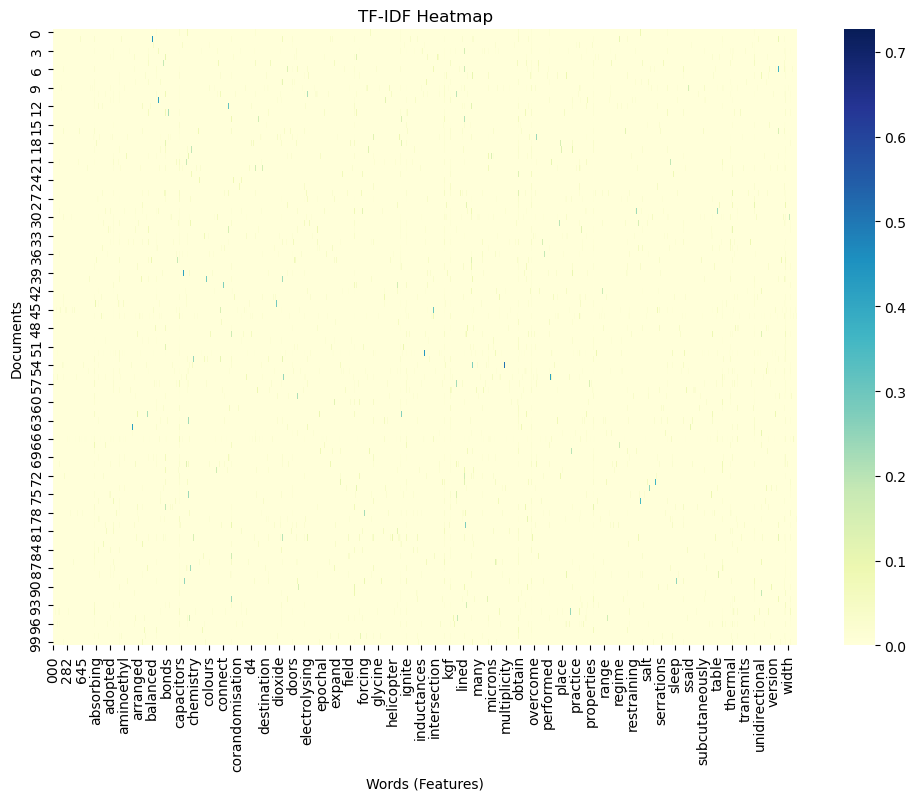

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert TF-IDF matrix to a Pandas DataFrame for better visualization
df_tfidf = pd.DataFrame(tfidf_values, columns=feature_names)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df_tfidf, cmap="YlGnBu", annot=False)
plt.title('TF-IDF Heatmap')
plt.xlabel('Words (Features)')
plt.ylabel('Documents')
plt.show()

### Patents in the US

In [3]:
import pandas as pd
codebook = pd.read_csv("/home/smildinerm/data/volume_2/data/USPTO/g_location_disambiguated.tsv.zip", delimiter="\t")

In [5]:
codebook.head()

,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
0,00235947-16c8-11ed-9b5f-1234bde3cd05,Westfield,PA,US,41.919237,-77.538874,Tioga,42.0,117.0
1,00236a27-16c8-11ed-9b5f-1234bde3cd05,Helfenstein,PA,US,40.750499,-76.447334,Schuylkill County,42.0,107.0
2,00236f47-16c8-11ed-9b5f-1234bde3cd05,Pine Forge,PA,US,40.281920,-75.692236,Berks County,42.0,11.0
3,00237418-16c8-11ed-9b5f-1234bde3cd05,Partlow,VA,US,38.038748,-77.638876,Spotsylvania County,51.0,177.0
4,002378d7-16c8-11ed-9b5f-1234bde3cd05,Stumpy Point,NC,US,35.698506,-75.740453,Dare,37.0,55.0


In [8]:
location = pd.read_csv("/home/smildinerm/data/volume_2/data/USPTO/g_location_not_disambiguated.tsv.zip", chunksize=100, delimiter="\t")

In [9]:
next(location)

,rawlocation_id,location_id,raw_city,raw_state,raw_country
0,000005mtrirpdyrtlkfbffj0e,1d2251c8-16c8-11ed-9b5f-1234bde3cd05,Kanagawa,NaN,JP
1,00006fjnoq057no2s4bse374r,439af3dd-16c8-11ed-9b5f-1234bde3cd05,Dallas,TX,US
2,0000bztanu9rrtm943i8a7wry,8d09bc30-16c8-11ed-9b5f-1234bde3cd05,Osaka,NaN,JP
3,0000c07c-672a-48d9-a3bb-71c439ac17b3,280c9de4-16c8-11ed-9b5f-1234bde3cd05,NaN,NaN,DE
4,0000dpr8zljw34um291yal5ym,cf4944e5-16c7-11ed-9b5f-1234bde3cd05,Sugar Land,TX,US
...,...,...,...,...,...
95,0003zedxk71lqsznpjtfences,a766cfcf-16c8-11ed-9b5f-1234bde3cd05,Westerhoven,NaN,NL
96,00040c86-5496-460e-95d0-04e8ff51ef30,7159b2a8-16c8-11ed-9b5f-1234bde3cd05,NaN,NaN,JP
97,00041j47asdh0x9m66uucsuna,7159b2a8-16c8-11ed-9b5f-1234bde3cd05,NaN,NaN,JP
98,00041yq0puz3qwz0mfqkxq4le,332ec243-16c8-11ed-9b5f-1234bde3cd05,Wenden,NaN,DE


### General tests for debugging

In [25]:
# 8621736

import json
import lzma
import re
from typing import List, Union, Dict
from pathlib import Path
from collections import Counter, defaultdict
from tqdm import tqdm
import os
import csv
import glob
import multiprocessing

def read_xz(compressed_fp: Union[Path, str]) -> List[Dict]:
    """Read an .xz file containing patents

    Arguments
    ---------
    compressed_fp:
        File to read the patents from.

    Results
    -------
    patents: List[Dict]
        Patents in the file.
    """
    with lzma.open(compressed_fp, mode="rb") as handle:
        patents = json.loads(handle.read().decode(encoding="utf-8"))
    return patents

storage_path = "/home/smildinerm/data/volume_2"
patent_dir = Path(f"{storage_path}/patents")
compressed_fp = patent_dir / Path(str(2014) + ".xz")

patents = read_xz(compressed_fp)

In [50]:
# Patent ID to check
target_patent_id = 8621736

# Check if the patent_id is in the list of dictionaries
found = any(d['patent'] == target_patent_id for d in patents)

# Print the result
if found:
    print(f"The patent_id {target_patent_id} is present in the list.")
else:
    print(f"The patent_id {target_patent_id} is not present in the list.")

The patent_id 8621736 is present in the list.


In [2]:
import pandas as pd
year = pd.read_csv("/home/smildinerm/data/volume_2/data/USPTO/input_files/year.csv", delimiter="\t")
year[year.iloc[:,0] == 8621735]

,pat,year
4660791,8621735,2014


In [52]:
cpc = pd.read_csv("/home/smildinerm/data/volume_2/data/USPTO/input_files/GPCPCs.txt", delimiter="\t")

In [64]:
# cpc[cpc.iloc[:,0] == 8621736]


,pat,progr,CPC
